In [ ]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'computer-science-students-career-prediction:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5399857%2F8969652%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240911%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240911T140426Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Dc2d4d2a497f93ef2568123272223b7d90e3f993dcd24ac4853f7e5f7534ff0328ec7e925d021341ac9fdb3fc7ea84c9c3e4369eda220a3338c5f9be9fed35e835f19304b71589977d4468efb0a70319f66ed6656d807d85a407e52a330e08c560725c1b1140b62b7dc019efd9a80c44cf8660bfe3c53a78a249c2a19288bbe3c7994e446dfbcc9d6b415be5d33bf2dedcf7002620accc061f202f7a1550ef92e9e125fc1a79099662a6c41270b8d6c215c53ca0fe6c1b091feb253372ccbebc4b133f5f7a9c7c26919e06c2964a69475f5bd666c86a748f6f6b787a888265ffcf36d4dbda6379107bd8344add1510461ce2fa28112b41ee1b54c1d3e4416d238'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')

[==================================================] 3309 bytes downloaded
Downloaded and uncompressed: computer-science-students-career-prediction
Data source import complete.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/kaggle/input/computer-science-students-career-prediction/cs_students.csv')

In [ ]:
data

,Student ID,Name,Gender,Age,GPA,Major,Interested Domain,Projects,Future Career,Python,SQL,Java
0,1,John Smith,Male,21,3.5,Computer Science,Artificial Intelligence,Chatbot Development,Machine Learning Researcher,Strong,Strong,Weak
1,2,Alice Johnson,Female,20,3.2,Computer Science,Data Science,Data Analytics,Data Scientist,Average,Strong,Weak
2,3,Robert Davis,Male,22,3.8,Computer Science,Software Development,E-commerce Website,Software Engineer,Strong,Strong,Average
3,4,Emily Wilson,Female,21,3.7,Computer Science,Web Development,Full-Stack Web App,Web Developer,Weak,Strong,Strong
4,5,Michael Brown,Male,23,3.4,Computer Science,Cybersecurity,Network Security,Information Security Analyst,Average,Weak,Strong
...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,Elijah Davis,Male,22,3.7,Computer Science,Web Development,Full-Stack Web App,Web Developer,Weak,Strong,Strong
176,177,Emma Johnson,Female,20,3.6,Computer Science,Cybersecurity,Security Auditing,Information Security Analyst,Strong,Average,Weak
177,178,Liam Wilson,Male,21,3.4,Computer Science,Machine Learning,Natural Language Processing,Machine Learning Engineer,Strong,Average,Weak
178,179,Sophia Johnson,Female,22,3.5,Computer Science,Database Management,SQL Database Administration,Database Administrator,Weak,Strong,Average


In [ ]:
data.head()

,Student ID,Name,Gender,Age,GPA,Major,Interested Domain,Projects,Future Career,Python,SQL,Java
0,1,John Smith,Male,21,3.5,Computer Science,Artificial Intelligence,Chatbot Development,Machine Learning Researcher,Strong,Strong,Weak
1,2,Alice Johnson,Female,20,3.2,Computer Science,Data Science,Data Analytics,Data Scientist,Average,Strong,Weak
2,3,Robert Davis,Male,22,3.8,Computer Science,Software Development,E-commerce Website,Software Engineer,Strong,Strong,Average
3,4,Emily Wilson,Female,21,3.7,Computer Science,Web Development,Full-Stack Web App,Web Developer,Weak,Strong,Strong
4,5,Michael Brown,Male,23,3.4,Computer Science,Cybersecurity,Network Security,Information Security Analyst,Average,Weak,Strong


In [ ]:
data.tail()

,Student ID,Name,Gender,Age,GPA,Major,Interested Domain,Projects,Future Career,Python,SQL,Java
175,176,Elijah Davis,Male,22,3.7,Computer Science,Web Development,Full-Stack Web App,Web Developer,Weak,Strong,Strong
176,177,Emma Johnson,Female,20,3.6,Computer Science,Cybersecurity,Security Auditing,Information Security Analyst,Strong,Average,Weak
177,178,Liam Wilson,Male,21,3.4,Computer Science,Machine Learning,Natural Language Processing,Machine Learning Engineer,Strong,Average,Weak
178,179,Sophia Johnson,Female,22,3.5,Computer Science,Database Management,SQL Database Administration,Database Administrator,Weak,Strong,Average
179,180,Michael Brown,Male,23,3.7,Computer Science,Cloud Computing,Cloud Solution Architecture,Cloud Solutions Architect,Strong,Strong,Weak


In [ ]:
data.info

<bound method DataFrame.info of      Student ID            Name  Gender  Age  GPA             Major  \
0             1      John Smith    Male   21  3.5  Computer Science   
1             2   Alice Johnson  Female   20  3.2  Computer Science   
2             3    Robert Davis    Male   22  3.8  Computer Science   
3             4    Emily Wilson  Female   21  3.7  Computer Science   
4             5   Michael Brown    Male   23  3.4  Computer Science   
..          ...             ...     ...  ...  ...               ...   
175         176    Elijah Davis    Male   22  3.7  Computer Science   
176         177    Emma Johnson  Female   20  3.6  Computer Science   
177         178     Liam Wilson    Male   21  3.4  Computer Science   
178         179  Sophia Johnson  Female   22  3.5  Computer Science   
179         180   Michael Brown    Male   23  3.7  Computer Science   

           Interested Domain                     Projects  \
0    Artificial Intelligence          Chatbot Development   
1               Data Science               Data Analytics   
2       Software Development           E-commerce Website   
3            Web Development           Full-Stack Web App   
4              Cybersecurity             Network Security   
..                       ...                          ...   
175          Web Development           Full-Stack Web App   
176            Cybersecurity            Security Auditing   
177         Machine Learning  Natural Language Processing   
178      Database Management  SQL Database Administration   
179          Cloud Computing  Cloud Solution Architecture   

                    Future Career   Python      SQL     Java  
0     Machine Learning Researcher   Strong   Strong     Weak  
1                  Data Scientist  Average   Strong     Weak  
2               Software Engineer   Strong   Strong  Average  
3                   Web Developer     Weak   Strong   Strong  
4    Information Security Analyst  Average     Weak   Strong  
..                            ...      ...      ...      ...  
175                 Web Developer     Weak   Strong   Strong  
176  Information Security Analyst   Strong  Average     Weak  
177     Machine Learning Engineer   Strong  Average     Weak  
178        Database Administrator     Weak   Strong  Average  
179     Cloud Solutions Architect   Strong   Strong     Weak  

[180 rows x 12 columns]>

In [ ]:
data.iloc()

In [ ]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
175,False
176,False
177,False
178,False


In [ ]:
data.shape

(180, 12)

In [ ]:
data.sample()

,Student ID,Name,Gender,Age,GPA,Major,Interested Domain,Projects,Future Career,Python,SQL,Java
117,118,Olivia Davis,Female,21,3.9,Computer Science,Software Development,Mobile App Development,Software Engineer,Strong,Strong,Average


In [ ]:
data.dtypes

,0
Student ID,int64
Name,object
Gender,object
Age,int64
GPA,float64
Major,object
Interested Domain,object
Projects,object
Future Career,object
Python,object


In [ ]:
data['Gender'].nunique()

2

In [ ]:
data['Age'].nunique()

9

In [ ]:
data['Interested Domain'].nunique()

27

In [ ]:
data['Future Career'].nunique()

33

In [ ]:
data['Python'].nunique()

3

In [ ]:
data['SQL'].nunique()

3

In [ ]:
data['Java'].nunique()

3

In [ ]:
data['Gender'].value_counts

<bound method IndexOpsMixin.value_counts of 0        Male
1      Female
2        Male
3      Female
4        Male
        ...  
175      Male
176    Female
177      Male
178    Female
179      Male
Name: Gender, Length: 180, dtype: object>

In [ ]:
data['Age'].value_counts

<bound method IndexOpsMixin.value_counts of 0      21
1      20
2      22
3      21
4      23
       ..
175    22
176    20
177    21
178    22
179    23
Name: Age, Length: 180, dtype: int64>

In [ ]:
data['GPA'].value_counts

<bound method IndexOpsMixin.value_counts of 0      3.5
1      3.2
2      3.8
3      3.7
4      3.4
      ... 
175    3.7
176    3.6
177    3.4
178    3.5
179    3.7
Name: GPA, Length: 180, dtype: float64>

In [ ]:
data['Interested Domain'].value_counts

<bound method IndexOpsMixin.value_counts of 0      Artificial Intelligence
1                 Data Science
2         Software Development
3              Web Development
4                Cybersecurity
                ...           
175            Web Development
176              Cybersecurity
177           Machine Learning
178        Database Management
179            Cloud Computing
Name: Interested Domain, Length: 180, dtype: object>

In [ ]:
data['Future Career'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Machine Learning Researcher
1                    Data Scientist
2                 Software Engineer
3                     Web Developer
4      Information Security Analyst
                   ...             
175                   Web Developer
176    Information Security Analyst
177       Machine Learning Engineer
178          Database Administrator
179       Cloud Solutions Architect
Name: Future Career, Length: 180, dtype: object>

In [25]:
data['Python'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Strong
1      Average
2       Strong
3         Weak
4      Average
        ...   
175       Weak
176     Strong
177     Strong
178       Weak
179     Strong
Name: Python, Length: 180, dtype: object>

In [26]:
data['SQL'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Strong
1       Strong
2       Strong
3       Strong
4         Weak
        ...   
175     Strong
176    Average
177    Average
178     Strong
179     Strong
Name: SQL, Length: 180, dtype: object>

In [27]:
data['Java'].value_counts

<bound method IndexOpsMixin.value_counts of 0         Weak
1         Weak
2      Average
3       Strong
4       Strong
        ...   
175     Strong
176       Weak
177       Weak
178    Average
179       Weak
Name: Java, Length: 180, dtype: object>

In [28]:
data.Gender.value_counts().sort_values(ascending=False)

,count
Gender,
Male,102
Female,78


In [29]:
data.GPA.value_counts().sort_values(ascending=False)

,count
GPA,
3.7,44
3.5,33
3.8,31
3.6,29
3.3,21
3.9,13
3.4,7
3.2,2


In [30]:
data.Python.value_counts().sort_values(ascending=False)

,count
Python,
Strong,70
Weak,64
Average,46


In [31]:
data.SQL.value_counts().sort_values(ascending=False)

,count
SQL,
Strong,79
Average,60
Weak,41


In [32]:
data.Java.value_counts().sort_values(ascending=False)

,count
Java,
Strong,69
Weak,64
Average,47


In [33]:
data.groupby(['Gender'])['Age'].value_counts()

Gender  Age
Female  22     31
        21     26
        20     16
        29      2
        31      1
        33      1
        37      1
Male    23     36
        21     22
        22     22
        20     18
        35      2
        33      1
        37      1
Name: count, dtype: int64

In [34]:
data.groupby(['Gender'])['GPA'].value_counts()

Gender  GPA
Female  3.7    23
        3.5    22
        3.8    10
        3.6     8
        3.9     8
        3.3     5
        3.2     2
Male    3.6    21
        3.7    21
        3.8    21
        3.3    16
        3.5    11
        3.4     7
        3.9     5
Name: count, dtype: int64

In [35]:
data.groupby(['Gender'])['Interested Domain'].value_counts()

Gender  Interested Domain             
Female  Cybersecurity                      9
        Mobile App Development             9
        Database Management                8
        Machine Learning                   7
        Cloud Computing                    6
        Computer Graphics                  6
        Web Development                    5
        Artificial Intelligence            5
        Software Development               5
        Data Science                       5
        Software Engineering               3
        Bioinformatics                     2
        Biomedical Computing               2
        Distributed Systems                1
        Game Development                   1
        Data Privacy                       1
        Natural Language Processing        1
        Computer Vision                    1
        Blockchain Technology              1
Male    Artificial Intelligence           14
        Web Development                   14
        Cloud Computing                   10
        Cybersecurity                      9
        Mobile App Development             8
        Database Management                8
        Data Science                       8
        Computer Graphics                  7
        Software Development               6
        Machine Learning                   6
        Software Engineering               2
        Quantum Computing                  2
        Human-Computer Interaction         2
        Digital Forensics                  1
        Geographic Information Systems     1
        Information Retrieval              1
        IoT (Internet of Things)           1
        Data Mining                        1
        Network Security                   1
Name: count, dtype: int64

In [36]:
data.groupby(['Gender'])['Future Career'].value_counts()

Gender  Future Career               
Female  Mobile App Developer             9
        Information Security Analyst     9
        Database Administrator           8
        Machine Learning Engineer        7
        Software Engineer                7
        Graphics Programmer              6
        Cloud Solutions Architect        6
        Web Developer                    5
        AI Researcher                    3
        Data Analyst                     3
        Data Scientist                   2
        NLP Research Scientist           2
        Bioinformatician                 2
        Healthcare IT Specialist         2
        Computer Vision Engineer         1
        Blockchain Engineer              1
        Game Developer                   1
        Data Privacy Specialist          1
        NLP Engineer                     1
        Distributed Systems Engineer     1
        Embedded Software Engineer       1
Male    Web Developer                   14
        Cloud Solutions Architect       10
        NLP Research Scientist           9
        Database Administrator           8
        Mobile App Developer             8
        Information Security Analyst     8
        Software Engineer                7
        Data Scientist                   6
        Machine Learning Engineer        6
        Graphics Programmer              3
        AI Researcher                    3
        Game Developer                   3
        Data Analyst                     3
        UX Designer                      2
        Quantum Computing Researcher     2
        Digital Forensics Specialist     1
        VR Developer                     1
        Security Analyst                 1
        SEO Specialist                   1
        Robotics Engineer                1
        Ethical Hacker                   1
        Machine Learning Researcher      1
        DevOps Engineer                  1
        Geospatial Analyst               1
        IoT Developer                    1
Name: count, dtype: int64

In [37]:
data.groupby(['Gender'])['Python'].value_counts()

Gender  Python 
Female  Weak       37
        Strong     27
        Average    14
Male    Strong     43
        Average    32
        Weak       27
Name: count, dtype: int64

In [38]:
data.groupby(['Gender'])['SQL'].value_counts()

Gender  SQL    
Female  Strong     36
        Average    30
        Weak       12
Male    Strong     43
        Average    30
        Weak       29
Name: count, dtype: int64

In [39]:
data.groupby(['Gender'])['Java'].value_counts()

Gender  Java   
Female  Strong     30
        Average    27
        Weak       21
Male    Weak       43
        Strong     39
        Average    20
Name: count, dtype: int64

In [40]:
data['Gender'].str.split(",")

,Gender
0,[Male]
1,[Female]
2,[Male]
3,[Female]
4,[Male]
...,...
175,[Male]
176,[Female]
177,[Male]
178,[Female]


In [41]:
lsplit = data['Gender'].str.split(",", expand=True)
lsplit


,0
0,Male
1,Female
2,Male
3,Female
4,Male
...,...
175,Male
176,Female
177,Male
178,Female


In [42]:
data.groupby(['Age'])['GPA'].value_counts()

Age  GPA
20   3.6    12
     3.3    11
     3.7     5
     3.8     3
     3.2     2
     3.5     1
21   3.5    11
     3.7    10
     3.9     9
     3.6     6
     3.8     6
     3.3     4
     3.4     2
22   3.7    20
     3.5    15
     3.8     9
     3.6     4
     3.4     3
     3.9     2
23   3.8    11
     3.7     7
     3.3     6
     3.5     5
     3.6     5
     3.4     2
29   3.6     1
     3.7     1
31   3.5     1
33   3.6     1
     3.8     1
35   3.9     2
37   3.7     1
     3.8     1
Name: count, dtype: int64

In [43]:
data.groupby(['Age'])['Interested Domain'].value_counts()

Age  Interested Domain     
20   Data Science              6
     Cybersecurity             5
     Mobile App Development    5
     Software Development      4
     Database Management       2
                              ..
33   Cybersecurity             1
35   Software Development      1
     Cloud Computing           1
37   Computer Graphics         1
     Database Management       1
Name: count, Length: 69, dtype: int64

In [44]:
data.groupby(['Age'])['Future Career'].value_counts()

Age  Future Career               
20   Mobile App Developer            5
     Data Scientist                  5
     Information Security Analyst    5
     Software Engineer               4
     Data Analyst                    2
                                    ..
33   Information Security Analyst    1
35   Cloud Solutions Architect       1
     Software Engineer               1
37   Database Administrator          1
     Graphics Programmer             1
Name: count, Length: 77, dtype: int64

In [45]:
data.groupby(['Age'])['Python'].value_counts()

Age  Python 
20   Strong     13
     Average    13
     Weak        8
21   Strong     22
     Weak       15
     Average    11
22   Weak       27
     Strong     16
     Average    10
23   Strong     16
     Weak       11
     Average     9
29   Strong      2
31   Weak        1
33   Average     1
     Weak        1
35   Average     1
     Strong      1
37   Average     1
     Weak        1
Name: count, dtype: int64

In [46]:
data.groupby(['Age'])['SQL'].value_counts()

Age  SQL    
20   Strong     13
     Average    11
     Weak       10
21   Average    21
     Strong     14
     Weak       13
22   Strong     32
     Average    13
     Weak        8
23   Strong     16
     Average    12
     Weak        8
29   Average     2
31   Strong      1
33   Strong      2
35   Strong      1
     Weak        1
37   Average     1
     Weak        1
Name: count, dtype: int64

In [47]:
data.groupby(['Age'])['Java'].value_counts()

Age  Java   
20   Weak       16
     Strong     13
     Average     5
21   Weak       21
     Strong     19
     Average     8
22   Average    25
     Strong     19
     Weak        9
23   Weak       16
     Strong     13
     Average     7
29   Strong      1
     Weak        1
31   Strong      1
33   Average     1
     Weak        1
35   Average     1
     Strong      1
37   Strong      2
Name: count, dtype: int64

In [48]:
useless_col = ['Student ID','Name','Major','Projects']
data.drop(columns = useless_col , inplace = True)
data.head()

,Gender,Age,GPA,Interested Domain,Future Career,Python,SQL,Java
0,Male,21,3.5,Artificial Intelligence,Machine Learning Researcher,Strong,Strong,Weak
1,Female,20,3.2,Data Science,Data Scientist,Average,Strong,Weak
2,Male,22,3.8,Software Development,Software Engineer,Strong,Strong,Average
3,Female,21,3.7,Web Development,Web Developer,Weak,Strong,Strong
4,Male,23,3.4,Cybersecurity,Information Security Analyst,Average,Weak,Strong


<Axes: xlabel='Gender', ylabel='count'>

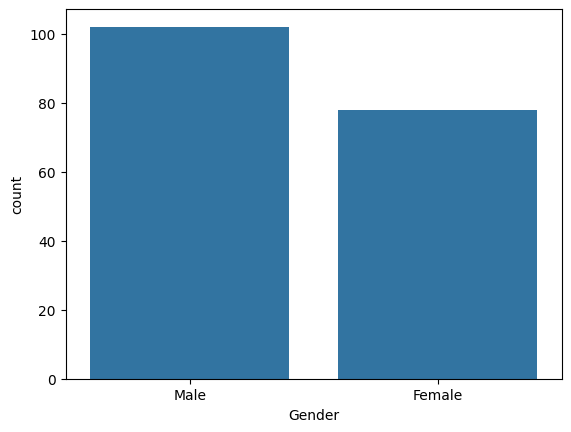

In [49]:
sns.countplot(x=data['Gender'])

<Axes: xlabel='Age', ylabel='count'>

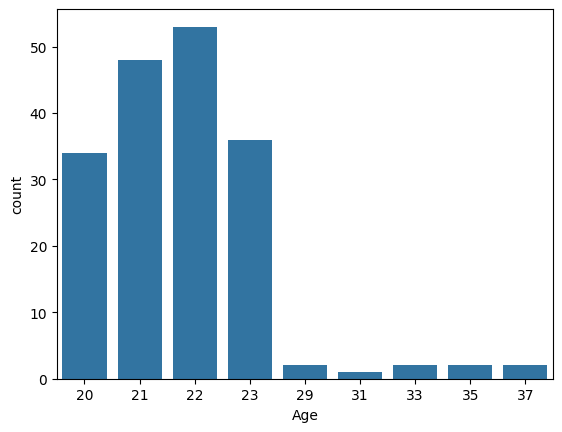

In [50]:
sns.countplot(x=data['Age'])

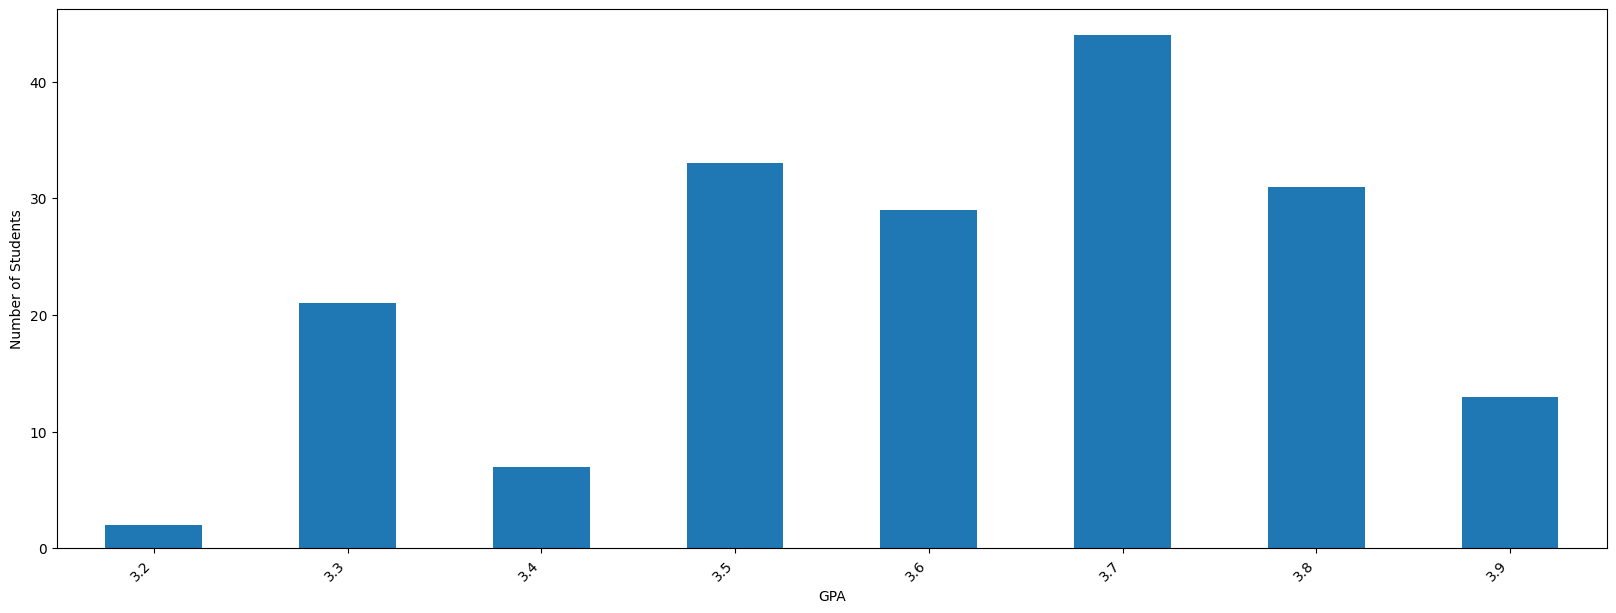

In [51]:
plt.figure(figsize=(20, 7))
ax = data.groupby('GPA').size().plot(kind='bar')
ax.set_xlabel('GPA')
ax.set_ylabel('Number of Students')
plt.xticks(rotation=45, ha='right')
plt.show()

In [52]:
data['Interested Domain'].nunique()

27

In [53]:
data['Interested Domain'].value_counts()

,count
Interested Domain,
Artificial Intelligence,19
Web Development,19
Cybersecurity,18
Mobile App Development,17
Database Management,16
Cloud Computing,16
Data Science,13
Machine Learning,13
Computer Graphics,13


In [54]:
data.isna().sum().sum()

0

In [55]:
data.duplicated().sum()

58

In [56]:
data.describe()

,Age,GPA
count,180.000000,180.000000
mean,22.116667,3.615000
std,2.823040,0.177341
min,20.000000,3.200000
25%,21.000000,3.500000
50%,22.000000,3.600000
75%,22.250000,3.700000
max,37.000000,3.900000


<Axes: xlabel='GPA', ylabel='Count'>

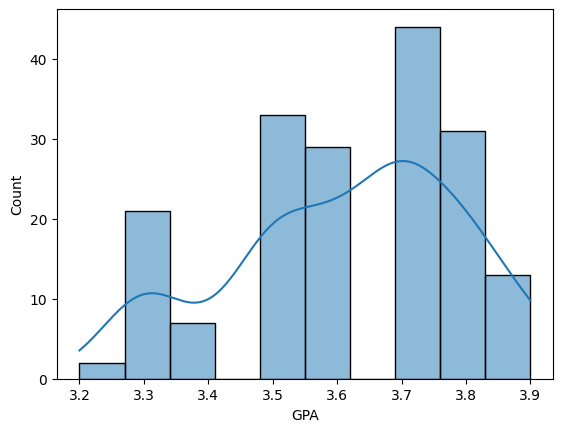

In [57]:
sns.histplot(data['GPA'], kde=True)

<Axes: xlabel='Age', ylabel='Count'>

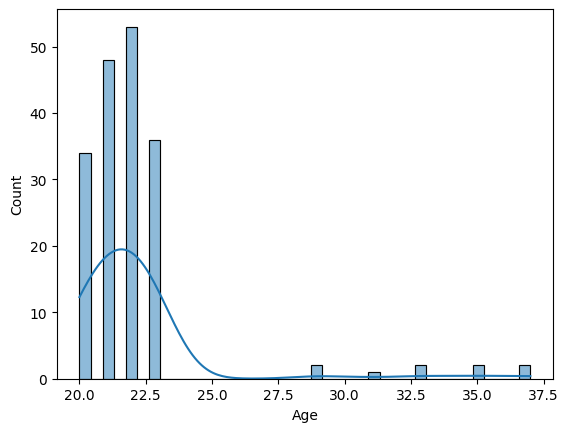

In [58]:
sns.histplot(data['Age'], kde=True)

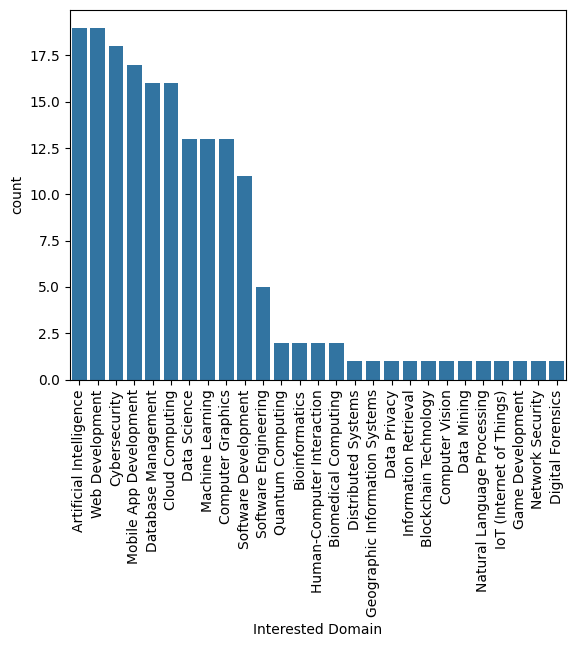

In [59]:
order = data['Interested Domain'].value_counts().index
sns.countplot(x='Interested Domain', data=data, order=order)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Age', ylabel='GPA'>

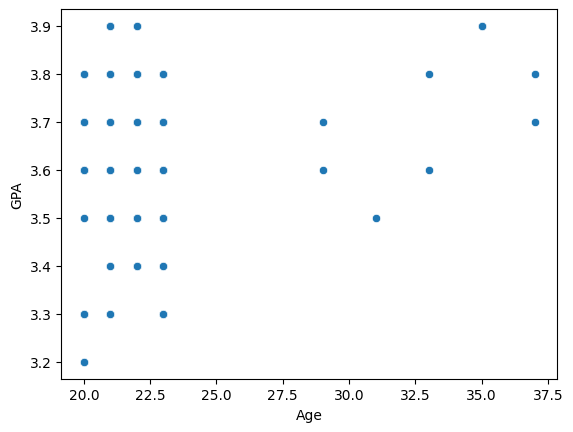

In [60]:
sns.scatterplot(x='Age', y='GPA', data=data)

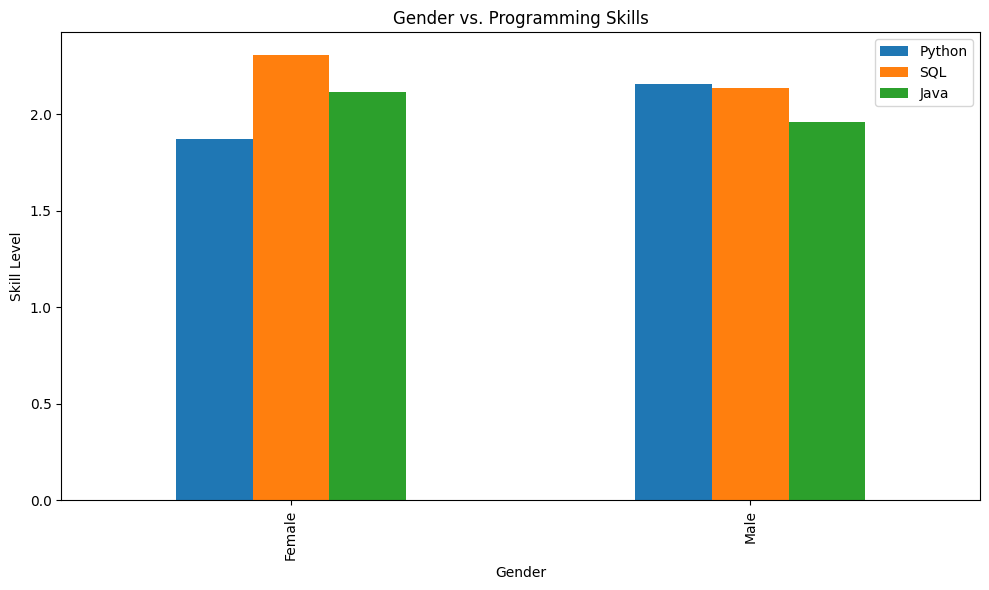

In [61]:
skill_level_mapping = {'Weak': 1, 'Average': 2, 'Strong': 3}
data['Python'] = data['Python'].map(skill_level_mapping)
data['SQL'] = data['SQL'].map(skill_level_mapping)
data['Java'] = data['Java'].map(skill_level_mapping)
data_grouped = data.groupby('Gender')[['Python', 'SQL', 'Java']].mean()

fig, ax = plt.subplots(figsize=(10, 6))
data_grouped.plot(kind='bar', ax=ax)
ax.set_title('Gender vs. Programming Skills')
ax.set_xlabel('Gender')
ax.set_ylabel('Skill Level')
ax.set_xticklabels(['Female', 'Male'])
ax.legend(['Python', 'SQL', 'Java'])

plt.tight_layout()
plt.show()